In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 
import numpy as np
import seaborn as sns
plt.style.use('seaborn')

In [7]:
df = pd.read_csv('Csvs/HighestGrossers.csv')
df.set_index("YEAR", inplace=True)
df

,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
YEAR,,,,,,,
1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978","4,23,06,002"
1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608","6,92,69,062"
1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","5,46,07,854"
1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","9,45,24,324"
1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749","8,47,32,942"
2000,How the Grinch Stole Christmas,Adventure,PG,Universal,"$253,367,455","$430,583,644","4,70,06,948"
2001,Harry Potter and the Sorcerer’s Stone,Adventure,PG,Warner Bros.,"$300,404,434","$486,166,890","5,30,74,988"
2002,Spider-Man,Adventure,PG-13,Sony Pictures,"$403,706,375","$636,480,273","6,94,84,746"
2003,Finding Nemo,Adventure,G,Walt Disney,"$339,714,367","$516,050,346","5,63,37,374"


In [8]:
df2 = pd.read_csv('Csvs/WideReleasesCount.csv')
df2.set_index("YEAR", inplace=True)
df2

,WARNER BROS,WALT DISNEY,20TH CENTURY FOX,PARAMOUNT PICTURES,SONY PICTURES,UNIVERSAL,TOTAL MAJOR 6,TOTAL OTHER STUDIOS
YEAR,,,,,,,,
1995,27,22,11,12,20,17,109,27
1996,31,23,13,16,24,13,120,22
1997,31,22,12,16,22,11,114,22
1998,27,21,11,11,20,16,106,20
1999,27,20,15,13,22,16,113,19
2000,29,22,13,12,15,13,104,27
2001,30,16,16,14,17,10,103,25
2002,32,23,15,16,20,13,119,21
2003,28,19,13,14,19,13,106,23


In [9]:
df['isForChild'] = df['MPAA RATING'].map({'PG-13':0, 'G':1, 'R': 0, 'PG': 1})
df

,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD,isForChild
YEAR,,,,,,,,
1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978","4,23,06,002",0
1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608","6,92,69,062",0
1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","5,46,07,854",0
1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","9,45,24,324",0
1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749","8,47,32,942",1
2000,How the Grinch Stole Christmas,Adventure,PG,Universal,"$253,367,455","$430,583,644","4,70,06,948",1
2001,Harry Potter and the Sorcerer’s Stone,Adventure,PG,Warner Bros.,"$300,404,434","$486,166,890","5,30,74,988",1
2002,Spider-Man,Adventure,PG-13,Sony Pictures,"$403,706,375","$636,480,273","6,94,84,746",0
2003,Finding Nemo,Adventure,G,Walt Disney,"$339,714,367","$516,050,346","5,63,37,374",1


# Creando variable categorica

Se crea una variable categoria (dummy) para clasificar cuando una pelicula esta dirigina a un publico infanil o no (1 = infantil, 0 = no infantil)

In [10]:
y = df["isForChild"]
print(y)

YEAR
1995    0
1996    0
1997    0
1998    0
1999    1
2000    1
2001    1
2002    0
2003    1
2004    1
2005    0
2006    0
2007    0
2008    0
2009    0
2010    1
2011    0
2012    0
2013    0
2014    0
2015    0
2016    1
2017    0
2018    0
2019    0
2020    0
2021    0
Name: isForChild, dtype: int64


### Creando el DatFrame con las variables

Se explicara a la categopria de peliculas (1=niños 0= no niños) en base a las productoras mas importantes 


    -disney
    -fox
    -paramount


para conocer cual es la probabilidad de que cuando salga una pelicula para niños, sea una productora la responsable 


In [11]:
df3 = pd.DataFrame()
df3['isforchild'] = y
df3['disney'] = df2['WALT DISNEY']
df3['fox'] = df2['20TH CENTURY FOX']
df3['paramount'] = df2['PARAMOUNT PICTURES']
df3['sony'] = df2['SONY PICTURES']
df3['universal'] = df2['UNIVERSAL']
df3.head()

,isforchild,disney,fox,paramount,sony,universal
YEAR,,,,,,
1995,0,22,11,12,20,17
1996,0,23,13,16,24,13
1997,0,22,12,16,22,11
1998,0,21,11,11,20,16
1999,1,20,15,13,22,16


## Primera regresión_

In [12]:
reg_logit = smf.logit("isforchild ~ disney + fox + paramount + sony + universal", data=df3).fit()
print(reg_logit.summary())

Optimization terminated successfully.
         Current function value: 0.389259
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             isforchild   No. Observations:                   27
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            5
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                  0.3198
Time:                        18:24:20   Log-Likelihood:                -10.510
converged:                       True   LL-Null:                       -15.452
Covariance Type:            nonrobust   LLR p-value:                   0.07861
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7386      5.324      0.139      0.890      -9.697      11.174
disney         0.1555      0.

Sony tiene una probabilidad de 0 porque no hace peliculas para niños

In [13]:
df[df['DISTRIBUTOR'] == 'Sony Pictures']

,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD,isForChild
YEAR,,,,,,,,
1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","5,46,07,854",0
2002,Spider-Man,Adventure,PG-13,Sony Pictures,"$403,706,375","$636,480,273","6,94,84,746",0
2007,Spider-Man 3,Adventure,PG-13,Sony Pictures,"$336,530,303","$448,054,878","4,89,14,288",0
2020,Bad Boys For Life,NaN,R,Sony Pictures,"$204,417,855","$204,417,848","2,23,16,359",0


Universal tiene una probabilidad de 0 porque no hace peliculas para niños (la probabilidad es demasiado baja y estadisticamente no significativa)

In [14]:
df[df['DISTRIBUTOR'] == 'Universal']

,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD,isForChild
YEAR,,,,,,,,
2000,How the Grinch Stole Christmas,Adventure,PG,Universal,"$253,367,455","$430,583,644","4,70,06,948",1


Se omite tanto a sony como a universal de la regresión debido a que no son estadisiticamente significativas

# Segunda regresión

In [15]:
reg_logit = smf.logit("isforchild ~ disney + fox + paramount", data=df3).fit()
print(reg_logit.summary())

Optimization terminated successfully.
         Current function value: 0.519274
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             isforchild   No. Observations:                   27
Model:                          Logit   Df Residuals:                       23
Method:                           MLE   Df Model:                            3
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                 0.09262
Time:                        18:24:20   Log-Likelihood:                -14.020
converged:                       True   LL-Null:                       -15.452
Covariance Type:            nonrobust   LLR p-value:                    0.4133
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2229      2.913     -1.450      0.147      -9.931       1.486
disney         0.1141      0.

Se omite el intercerpto debido a que solo regresente el punto de inicio de la regresión mas no una probabilidad de la variable exógena como tal

Se observa que si una pelicula para niños es lanzada al mercado, existe un 11% de probabilidad de que disney haya producido la pelicula, 4%

In [16]:
# Eliminando el intercepto
parametros_letras = list(reg_logit.params.keys())
parametros_valores = list(reg_logit.params.values)
parametros_letras.pop(0)
parametros_valores.pop(0)
print(parametros_letras)
print(parametros_valores)


['disney', 'fox', 'paramount']
[0.11413232490601805, 0.04598751658049711, 0.05217692768027939]


In [17]:
# Conviertiendo las series a un pandas series para ordenarlos posteriormente de manera ascendente
serie_resultados = pd.Series(parametros_valores, index=parametros_letras)
serie_resultados

disney       0.114132
fox          0.045988
paramount    0.052177
dtype: float64

In [18]:
# Ordenando los valores
serie_resultados.sort_values(ascending=False, inplace=True)
serie_resultados

disney       0.114132
paramount    0.052177
fox          0.045988
dtype: float64

Text(0, 0.5, 'Probabilidad')

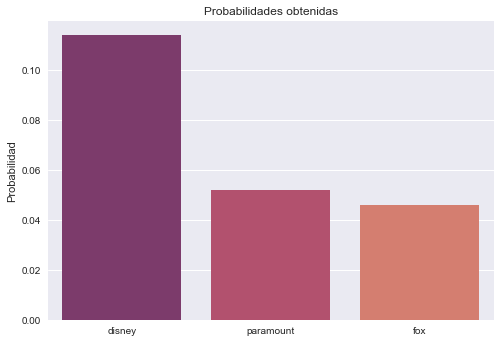

In [19]:
plt.title('Probabilidades obtenidas')
sns.barplot(x=serie_resultados.index, y=serie_resultados.values, palette='flare_r')
plt.ylabel('Probabilidad')